## compare the latency with differernt batch size

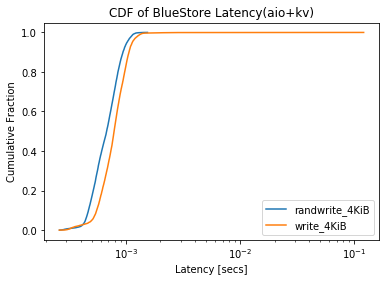

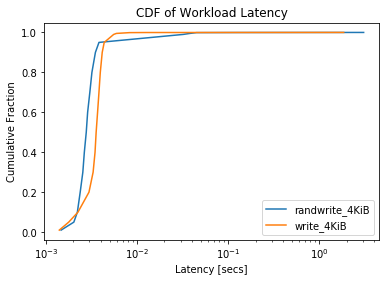

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import pandas as pd
import json

# CDF of BlueStore Latency(aio + kv)
x1 = []
x2 = []
x3 = []
y1 = []
f1='batch_inf_4k_randw_60s/dump_total_bluestore_simple_write_lat_vec-48.csv'
f2='batch_inf_4k_write_60s/dump_total_bluestore_simple_write_lat_vec-48.csv'
data1=read_csv(f1, header=0, skiprows=10000, nrows=10000, parse_dates=True, squeeze=True).sort_values(ignore_index=True)
data2=read_csv(f2, header=0, skiprows=10000, nrows=10000, parse_dates=True, squeeze=True).sort_values(ignore_index=True)

for i in range(0, 10000, 2):
    x1.append(data1[int(i/10000. * len(data1))])
    x2.append(data2[int(i/10000. * len(data1))])
    y1.append(i/10000.)
    
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x1, y1, label='randwrite_4KiB')
ax.plot(x2, y1, label='write_4KiB')
ax.set(xlabel='Latency [secs]', ylabel='Cumulative Fraction', title='CDF of BlueStore Latency(aio+kv)')
plt.legend()
plt.show()
plt.close()

# CDF of workload latency (4KB FIO rand)
with open('batch_inf_4k_randw_60s/dump-fio-bench-48.json') as f:
  data1 = json.load(f)
with open('batch_inf_4k_write_60s/dump-fio-bench-48.json') as f:
  data2 = json.load(f)

x1 = []
x2 = []
y1 = []
for key, value in data1['jobs'][0]['write']['clat_ns']['percentile'].items():
    x1.append(value/1000000000)
    y1.append(float(key)/100)
for key, value in data2['jobs'][0]['write']['clat_ns']['percentile'].items():
    x2.append(value/1000000000)

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x1, y1, label='randwrite_4KiB')
ax.plot(x2, y1, label='write_4KiB')

ax.set(xlabel='Latency [secs]', ylabel='Cumulative Fraction', title='CDF of Workload Latency')
plt.legend()
plt.show()
plt.close()


